<a href="https://colab.research.google.com/github/legobitna/DeepLearning-basic/blob/main/7_2b_Lab_The_Mechanics_of_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - The mechanics of TF2

## Basic TensorFLow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [3]:
import tensorflow as tf

print(tf.__version__)

2.3.0


### Hello world

In [4]:
# Create a constant Tensor with the value "Hello, TensorFlow!"
x= tf.constant("hellow, tensorflow")
# Print out the tensor
print("tensor",x)
# Print out the numpy value
x.numpy()

tensor tf.Tensor(b'hellow, tensorflow', shape=(), dtype=string)


b'hellow, tensorflow'

### Variables

Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor.

In [5]:
# Create a variable with value 1
y = tf.Variable(1)

# Print out the tensor
print(y)
# Print out the numpy value
y.numpy()

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


1

In [6]:
# Increase the value by one in Pythonic way

y = y+1
print("value",y.numpy())
# Increase the value by one using assign_add()
y = tf.Variable(y)
y.assign_add(y,1)
y.numpy()


value 2


4

### Basic Operations

In [7]:
# Create a tensor with all ones and shape (2, 3)
z = tf.ones(shape=(2,3))
print(z)


tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [8]:
# Try to assign the element at (0,0) by 5
# z[0,0] = 5

In [9]:
# Try again with the function assign()
z= tf.Variable(z)
z[0,0].assign(5)
print(z)


<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[5., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [10]:
# Matrix multiplication

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1,matrix2)
print("Multiplication with matrixes:", product)

# broadcast matrix in Multiplication, try to use *
print("broadcast matrix in Multiplication:", matrix1 * matrix2)

Multiplication with matrixes: tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
broadcast matrix in Multiplication: tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)


In [11]:
# Cast operation, change the dtype of a to int32 and assign to b
a = tf.convert_to_tensor(2.)
b = tf.cast(a, tf.int32)
print(a, b)


tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(2, shape=(), dtype=int32)


In [12]:
# Get the shape of a
a = tf.ones([2,3])
print(a.shape[0], a.shape[1]) # 2, 3
shape = tf.shape(a)           # a tensor
print(shape[0], shape[1])

2 3
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)


### Activation Functions

In [13]:
# fake data
x = np.linspace(-5, 5, 100)
x.shape

(100,)

In [14]:
# Create relu, elu, sigmoid, tanh, softmax activation function
y_relu = tf.nn.relu(x)
y_elu = tf.nn.elu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softmax = tf.nn.softmax(x)

print(y_relu.shape)


(100,)


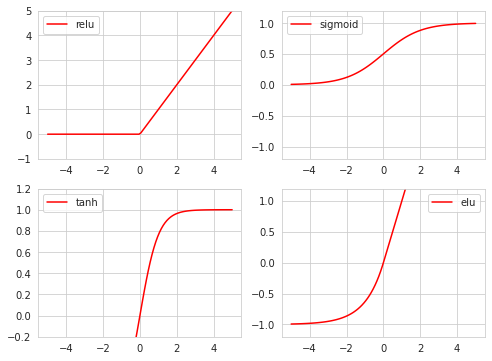

In [15]:
# plt to visualize relu, elu, sigmoid, tanh
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x,y_sigmoid, c="red",label='sigmoid')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x,y_tanh, c="red",label='tanh')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x,y_elu, c="red",label='elu')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.show()

### Gradient Tape

tf.GradientTape is an API for automatic differentiation - computing the gradient of a computation with respect to its input variables. Tensorflow "records" all operations executed inside the context of a tf.GradientTape onto a "tape"

In [16]:
# Create y = x**2 and z = y**2, use GradientTape to calculate dz_dx and dy_dx

x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    # Your code here
    t.watch(x)
    y = x*x
    z= y*y
    
    dz_dx = t.gradient(z,x)
    dy_dx= t.gradient(y,x)

print("dz/dx=", dz_dx.numpy())
print("dy/dx=", dy_dx.numpy())
del t  # Drop the reference to the tape

dz/dx= 108.0
dy/dx= 6.0


**Recording control flow**: Because tapes record operations as they are executed, Python control flow (using ifs and whiles for example) is naturally handled

In [17]:
def f(x, y):
    '''Give two integer x, y

        
    Return
    if x is larger than 5, then return 2*x +7*y
    otherwise, then return 7*x + 2*y
    '''
    # Your code here
    if(x>5):
        output = 2*x + 7*y
    else:
        output = 7*x + 2*y
    
    return output

def grad(x, y):
    '''Using GradientTape to calculate df_dx'''
    # Your code here

    with tf.GradientTape(persistent=True) as t:
      t.watch(x)
      out = f(x,y)
      return t.gradient(out,x)

x = tf.convert_to_tensor(2.0)
assert grad(x, 3).numpy() == 7.0
x = tf.convert_to_tensor(6.0)
assert grad(x, 4).numpy() == 2.0
print(grad(x, 4).numpy() == 2.0)

True


## Sequential, Functional, Subclassing API

### Get data

Let's import the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) and tackle it using a regression neural network

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [19]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [20]:
housing.data.shape

(20640, 8)

In [21]:
# Create training, validation, and test set with test_size=0.2
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X_train_full, x_test, Y_train_full, y_test = train_test_split(housing.data,housing.target, test_size=0.2)
x_train, x_valid,y_train,y_valid = train_test_split(X_train_full,Y_train_full, test_size=0.2)
# Scale training data and transform validation and test data
# Your code here
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train) # put the data into 0to 1 with scaler and it will re range the data with transform 
x_test =scaler.fit_transform(x_test)
x_valid=scaler.fit_transform(x_valid)


In [22]:
scaler_2 = StandardScaler();
x = np.array([100., 200., 300., 400., 500.]).reshape((-1, 1))
y = scaler_2.fit_transform(x)  #  병균을구해서 빼버림 
y.std()  # 이 숫자는 1이다 

0.9999999999999999

### Sequential API

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions.

In [26]:
# Neural Network with 1 hidden layers with 30 nodes, 
# Activation function: relu
# Loss: MSE, optimizer: SGD, learning rate: 1e-2
# Train the model 20 epochs
# Your code here
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=x_train.shape[1:]),
     tf.keras.layers.Dense(1)
])

# Display all the model's layers
model.summary()

optimizer = tf.keras.optimizers.SGD(lr=1e-2)
model.compile(loss="MSE",
              optimizer=optimizer)

history = model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
413/413 [==============================] - 1s 1ms/step - loss: 0.7889 - val_loss: 0.5697
Epoch 2/20
413/413 [==============================] - 0s 997us/step - loss: 0.4948 - val_loss: 0.4864
Epoch 3/20
413/413 [==============================] - 0s 1ms/step - loss: 0.4412 - val_loss: 0.4687
Epoch 4/20
413/413 [==============================] - 0s 992us/step - loss: 0.4155 - val_loss: 0.4635
Epoch 5/20
413/413 [==============================] - 0s 1ms/step - loss: 0.4251 - val_loss: 0.4447
Epoch 6/20
413

In [27]:
# Get the MSE loss on test set
# Your code here
model.evaluate(x_test,y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.4004


0.4004483222961426

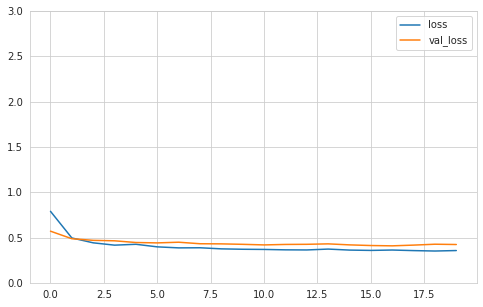

In [29]:
# Plot learning curve
# Your code here

ax = pd.DataFrame(history.history).plot(figsize=(8, 5))
ax.set_ylim(0, 3)
plt.show()


### Functional API

Implement the wide-deep architecture. Suppose we want to send five features through the wide path (feature 0 to 4), and six features through the deep path (features 2 to 7). And we want to add one more auxiliary output in the architecture. 

<img src="https://i.imgur.com/lQwcGmJ.png" width="30%" />

In [31]:
# Get X_train_A, X_valid_A, X_test_A which contain the first 5 features
# Get X_train_B, X_valid_B, X_test_B which contain the features 2 to 7
# Get X_new_A, X_new_B which is the first 3 rows of X_test_A and X_test_B
X_train_A, X_train_B = x_train[:, :5], x_train[:, 2:]
X_valid_A, X_valid_B = x_valid[:, :5], x_valid[:, 2:]
X_test_A, X_test_B = x_test[:, :5], x_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Functional API model
# Your code here

input_A = tf.keras.layers.Input(shape=[5], name="wide_input")
input_B = tf.keras.layers.Input(shape=[6], name="deep_input")
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([input_A, hidden2])
output = tf.keras.layers.Dense(1, name="main_output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)
model = tf.keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# Compiling the model
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.SGD(lr=1e-2))

# Training the model
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.9802 - main_output_loss: 0.8698 - aux_output_loss: 1.9740 - val_loss: 0.6051 - val_main_output_loss: 0.5405 - val_aux_output_loss: 1.1864
Epoch 2/20
413/413 [==============================] - 1s 1ms/step - loss: 0.5508 - main_output_loss: 0.5004 - aux_output_loss: 1.0046 - val_loss: 0.5490 - val_main_output_loss: 0.5001 - val_aux_output_loss: 0.9890
Epoch 3/20
413/413 [==============================] - 1s 1ms/step - loss: 0.5273 - main_output_loss: 0.4916 - aux_output_loss: 0.8485 - val_loss: 0.5399 - val_main_output_loss: 0.4986 - val_aux_output_loss: 0.9120
Epoch 4/20
413/413 [==============================] - 1s 1ms/step - loss: 0.4919 - main_output_loss: 0.4593 - aux_output_loss: 0.7862 - val_loss: 0.5061 - val_main_output_loss: 0.4646 - val_aux_output_loss: 0.8802
Epoch 5/20
413/413 [==============================] - 1s 1ms/step - loss: 0.4498 - main_output_loss: 0.4160 - aux_output_loss: 0.7537 - val_loss

In [33]:
# Evaluating the model
# Your code here
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

129/129 [==============================] - 0s 1ms/step - loss: 0.4142 - main_output_loss: 0.4004 - aux_output_loss: 0.5384


(0.41420796513557434, 0.4004060924053192, 0.5384257435798645)

In [34]:
# Predicting
# Your code here
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[2.696436 ],
        [1.0570691],
        [1.9550399]], dtype=float32), array([[2.0214152],
        [0.9452407],
        [1.9925157]], dtype=float32))

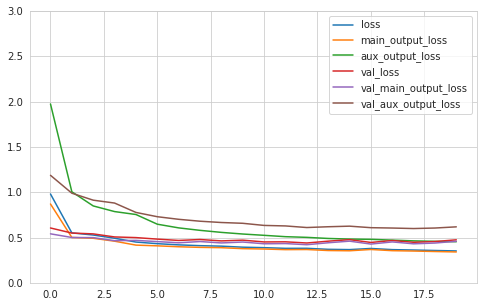

In [35]:
# Plot learning curve
# Your code here
ax = pd.DataFrame(history.history).plot(figsize=(8, 5))
ax.set_ylim(0, 3)
plt.show()

### Subclassing API

Train the subclassing model (in the lecture).

In [36]:
class WideAndDeepModel(tf.keras.Model):
   
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


model = WideAndDeepModel()

# Compiling the model
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.SGD(lr=1e-2))

# Training the model
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 1.0897 - output_1_loss: 0.9743 - output_2_loss: 2.1284 - val_loss: 0.6964 - val_output_1_loss: 0.6302 - val_output_2_loss: 1.2919
Epoch 2/20
413/413 [==============================] - 1s 1ms/step - loss: 0.6168 - output_1_loss: 0.5614 - output_2_loss: 1.1151 - val_loss: 0.5805 - val_output_1_loss: 0.5235 - val_output_2_loss: 1.0935
Epoch 3/20
413/413 [==============================] - 1s 1ms/step - loss: 0.5151 - output_1_loss: 0.4676 - output_2_loss: 0.9424 - val_loss: 0.5322 - val_output_1_loss: 0.4859 - val_output_2_loss: 0.9489
Epoch 4/20
413/413 [==============================] - 1s 1ms/step - loss: 0.4678 - output_1_loss: 0.4305 - output_2_loss: 0.8038 - val_loss: 0.5042 - val_output_1_loss: 0.4656 - val_output_2_loss: 0.8509
Epoch 5/20
413/413 [==============================] - 1s 1ms/step - loss: 0.4470 - output_1_loss: 0.4171 - output_2_loss: 0.7163 - val_loss: 0.4987 - val_output_1_loss: 0.4659 - val_ou

In [37]:
# Evaluating the model
# Your code here
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss



129/129 [==============================] - 0s 1ms/step - loss: 0.3799 - output_1_loss: 0.3682 - output_2_loss: 0.4850


(0.37985959649086, 0.36817988753318787, 0.4849776327610016)

In [38]:
# Predicting
# Your code here
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux


(array([[3.0139108],
        [1.309146 ],
        [1.9048145]], dtype=float32), array([[2.1873727],
        [1.1792185],
        [1.8944123]], dtype=float32))

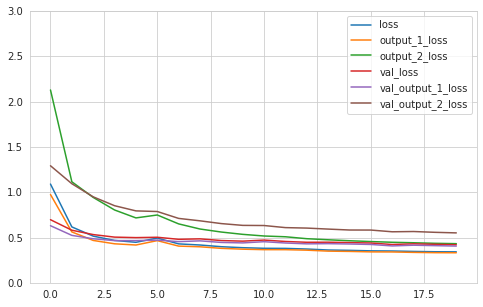

In [39]:
# Plot learning curve
# Your code here
ax = pd.DataFrame(history.history).plot(figsize=(8, 5))
ax.set_ylim(0, 3)
plt.show()

**GOOD JOB!!**